<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>APRENDIZADO DE MÁQUINA (CIC1205/GCC1932) - Trabalho 1</center></h1>

- Nome completo: <NOME_COMPLETO>
- [Link para vídeo](<LINK_VIDEO>)

# (1) Predição de pagamento de empréstimos

Esse conjunto de dados contém diversos atributos que são categóricos. Modelos de AM
não podem ser treinados no Scikit-Learn sobre atributos cujos valores são cadeias de
caracteres. Sendo assim, você deve tomar providências para codificar numericamente
esses atributos de maneira apropriada.

In [60]:
import pandas as pd


path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
train = 'credtrain.txt'
test = 'credtest.txt'

nomes_colunas = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

credtrain = pd.read_csv(f'{path}/{train}', names=nomes_colunas, delimiter='\t')
credtest = pd.read_csv(f'{path}/{test}', names=nomes_colunas, delimiter='\t')


X_train = credtrain.drop(columns=['CLASSE'])
X_test = credtest.drop(columns=['CLASSE'])

y_train = credtrain['CLASSE']
y_test_Q1 = credtest['CLASSE']



In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# As colunas ESCT é uma variável categórica que deve ser transformada para que o algoritmo seja capaz de processá-la
categorical_col = ['ESCT']


# OneHotEncoder setup
encoder = OneHotEncoder(
    categories='auto',
    drop=None,
    sparse_output=False,
    dtype=np.float64
) 


# fit transform em Xtrain e Xtest   
encoded_train = encoder.fit_transform(X_train[categorical_col])
encoded_test = encoder.transform(X_test[categorical_col]) 



encoded_col_names = encoder.get_feature_names_out(categorical_col)
# print(encoded_col_names) -- > ['ESCT_0' 'ESCT_1' 'ESCT_2' 'ESCT_3']



# Converter para DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_col_names, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_col_names, index=X_test.index)

# Remover a coluna original e concatenar no Dataframe
X_train = pd.concat([X_train.drop(columns=categorical_col), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_col), encoded_test_df], axis=1)

print(X_train)

      NDEP  RENDA  TIPOR  VBEM  NPARC  VPARC  TEL  IDADE  RESMS  ENTRADA  \
0        0    360      0   313      9     52    0     25     48        0   
1        0    350      1   468     10     65    0     33      6        0   
2        0   1100      0   829      9    125    0     56     48        0   
3        0   3000      0   552     12     76    1     31     60        0   
4        0   1000      0   809     12    111    0     24      7        0   
...    ...    ...    ...   ...    ...    ...  ...    ...    ...      ...   
1495     0    500      0   437     12     60    0     60     48        0   
1496     0   2057      0   301      1    318    0     35     48        0   
1497     0    570      0   511     12     71    1     28    144        0   
1498     0    360      0   384     12     52    0     33     36        0   
1499     4    501      1   849     10    117    0     37      6        0   

      ESCT_0  ESCT_1  ESCT_2  ESCT_3  
0        0.0     1.0     0.0     0.0  
1        

In [ ]:
# Vamos aplicar o Standard Scaler para os dados numéricos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# melhora a convergência de modelos

# ex: RENDA varia de 300-9700 enquanto IDADE varia de 18 a 70
# Logo, a função de otimização pode se tornar instável

# Aplicar o scaler evita que as features com escalas diferentes dominem o modelo,
# dando mais peso a algumas variáveis

# Modelos baseados em distância, como o KNN, precisam de inputs padronizados

numerical_cols = ['RENDA', 'VBEM', 'NPARC', 'VPARC', 'IDADE', 'RESMS', 'ENTRADA']


# Aplicar o scaler e transformar para pd.DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols) # aplicar o fit somente no dataset de train
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols)



# Remover a coluna original e concatenar no Dataframe original
X_train = pd.concat([X_train.drop(columns=numerical_cols), X_train_scaled], axis=1)
X_test = pd.concat([X_test.drop(columns=numerical_cols), X_test_scaled], axis=1)


#print(X_train.head())
# Dados numéricos normalizados

print(X_train.head())




   NDEP  TIPOR  TEL  ESCT_0  ESCT_1  ESCT_2  ESCT_3     RENDA      VBEM  \
0     0      0    0     0.0     1.0     0.0     0.0 -0.689892 -0.937611   
1     0      1    0     1.0     0.0     0.0     0.0 -0.700939 -0.354031   
2     0      0    0     1.0     0.0     0.0     0.0  0.127578  1.005145   
3     0      0    1     1.0     0.0     0.0     0.0  2.226490 -0.037768   
4     0      0    0     0.0     1.0     0.0     0.0  0.017109  0.929845   

      NPARC     VPARC     IDADE     RESMS   ENTRADA  
0  0.168333 -0.798003 -1.228280  0.312878 -0.342137  
1  0.445500 -0.591544 -0.622121 -0.484925 -0.342137  
2  0.168333  0.361347  1.120585  0.312878 -0.342137  
3  0.999835 -0.416847 -0.773661  0.540822 -0.342137  
4  0.999835  0.139006 -1.304049 -0.465930 -0.342137  


Após realizar os passos de pré-processamento adequados, você deve criar modelos de classificação
por meio dos algoritmos de aprendizado de máquina implementados nas seguintes
classes da biblioteca Scikit-Learn. (Por simplicidade, você pode manter os valores default dos
hiperparâmetros de cada algoritmo.)

1. sklearn.linear_model.LogisticRegression
2. sklearn.neighbors.KNeighborsClassifier
3. sklearn.ensemble.GradientBoostingClassifier

In [ ]:

from sklearn.linear_model import LogisticRegression

model_LR_Q1 = LogisticRegression()

model_LR_Q1.fit(X_train, y_train)
 
#y_pred = model_LR.predict(x_test)  # Utiliza um threshold de 0.5 por default e retorna ou 0 ou 1 para cada amostra

y_pred_prob_lr = model_LR_Q1.predict_proba(X_test)[:,1] # retorna as probabilidades predizidas da classe positiva

# Ou seja, y_pred_prob_lr returna um float entre 0 e 1 para cada amostra

In [55]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN_Q1 = KNeighborsClassifier() # num vizinhos = 5
model_KNN_Q1.fit(X_train, y_train)

y_pred_prob_KNN = model_KNN_Q1.predict_proba(X_test)[:,1]

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC_Q1 = GradientBoostingClassifier()
model_GBC_Q1.fit(X_train, y_train)

y_pred_prob_Tree = model_GBC_Q1.predict_proba(X_test)[:,1]

Construa um gráfico que apresenta a curva ROC para os três algoritmos acima.

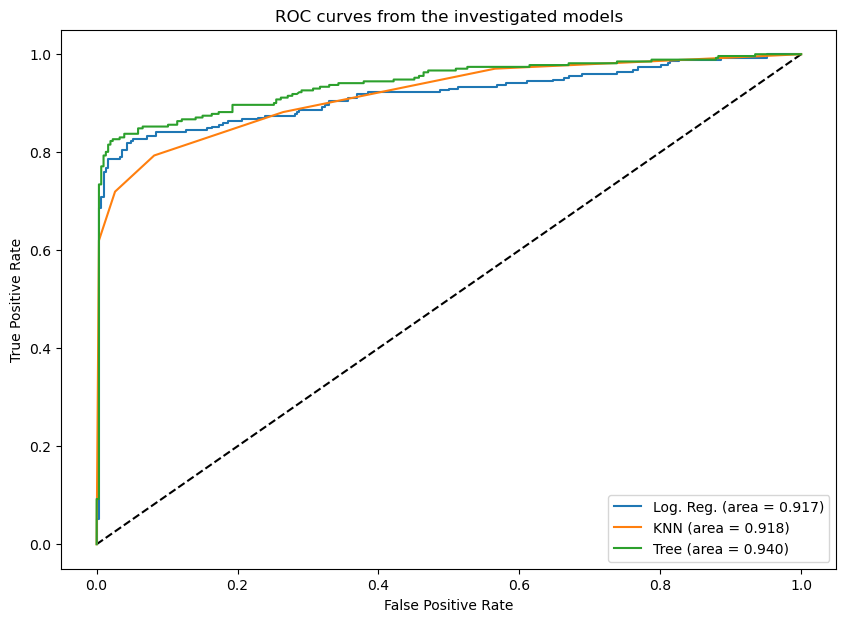

In [ ]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_Q1, y_pred_prob_lr)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test_Q1, y_pred_prob_KNN)
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test_Q1, y_pred_prob_Tree)

# Warning: Data Leakage!



# Área abaixo da curva ROC
# É uma métrica de performance pra mensurar a habilidade de um classificador binário
# Discernir entre classes positivas e negativas
roc_auc_LR = auc(fpr_lr, tpr_lr)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
roc_auc_gbc = auc(fpr_Tree, tpr_Tree)


# Rate de falsos positivos --> eixo X 
# Rate de Verdadeiros Positivos --> eixo Y
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log. Reg. (area = %0.3f)' % roc_auc_LR)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_gbc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

# O AUC do modelo Tree-based (Gradient Boosting Classifier) possui o maior AUC, 
# logo com maior indicador de ter maior poder preditivo


Use algum dos critérios de escolha de limiar apresentado em aula para definir o limiar de classificação
para cada um desses algoritmos.

In [47]:
 # O ponto de cut-off (ou limiar) é um valor que limita um classificador binário 
 # pra determinar qual classe um exemplo pertence
 # Se P(class(x) = 1) >= α, então predizir classe 1, senão 0
 
 # geralmente é 0.5
 
 # Vamos calcular o Youden's J para cada limiar
j_scores_lr = tpr_lr - fpr_lr
j_scores_KNN = tpr_KNN - fpr_KNN
j_scores_tree = tpr_Tree - fpr_Tree


# Vamos encontrar o limiar que maximize o index de Youden
optimal_idx_lr = np.argmax(j_scores_lr)
optimal_idx_knn = np.argmax(j_scores_KNN)
optimal_idx_tree = np.argmax(j_scores_tree)

optimal_threshold_lr = thresholds_lr[optimal_idx_lr]
optimal_threshold_knn = thresholds_KNN[optimal_idx_knn]
optimal_threshold_tree = thresholds_Tree[optimal_idx_tree]
print(f"Optimal threshold for Logistic Regression: {optimal_threshold_lr:.4f} (Index: {optimal_idx_lr})")
print(f"Optimal threshold for KNN: {thresholds_KNN[optimal_idx_knn]:.4f} (Index: {optimal_idx_knn})")
print(f"Optimal threshold for Gradient Boosting Classifier: {thresholds_Tree[optimal_idx_tree]:.4f} (Index: {optimal_idx_tree})")


 

Optimal threshold for Logistic Regression: 0.5109 (Index: 18)
Optimal threshold for KNN: 0.6000 (Index: 3)
Optimal threshold for Gradient Boosting Classifier: 0.5567 (Index: 30)


Após o treinamento e a escolha de limiares adequados, você deve avaliar a qualidade preditiva
dos modelos correspondentes. Para isso, você deve usar os exemplos do conjunto de teste.
Isso permitirá que você avalie o quão efetivo foi o passo de treinamento dos modelos, ou seja,
qual o poder preditivo de cada modelo de classificação.
- Produza a matriz de confusão (confusion matrix) relativa aos resultados da fase de testes
para cada modelo.
- Apresente também o relatório produzido pela função classification_report do Scikit-
Learn.

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt


y_pred_lr = [1 if prob>=optimal_threshold_lr else 0 for prob in y_pred_prob_lr]
y_pred_knn = [1 if prob >= optimal_threshold_knn else 0 for prob in y_pred_prob_KNN]
y_pred_tree = [1 if prob >+ optimal_threshold_tree else 0 for prob in y_pred_prob_Tree]


              precision    recall  f1-score   support

           0       0.86      0.96      0.90       306
           1       0.94      0.82      0.88       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.90      0.89      0.89       577



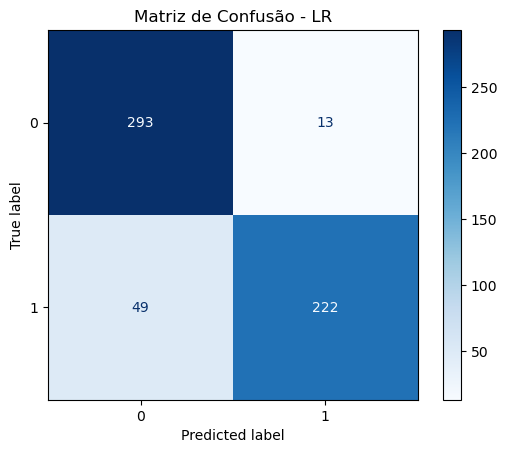

In [ ]:
cm = confusion_matrix(y_test_Q1, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_Q1))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - LR')

print(classification_report(y_test_Q1, y_pred_lr))

# precision =  TP / TP + FP  --> (quantos predizidos corretamente pra uma classe X) / (quantos ao todo tem nessa classe X)
# recall = TP / TP + FN   --> (quantos predizidos corretamente pra uma classe X) / (quantos predizidos pra uma classe X)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       306
           1       0.90      0.79      0.84       271

    accuracy                           0.86       577
   macro avg       0.86      0.86      0.86       577
weighted avg       0.86      0.86      0.86       577



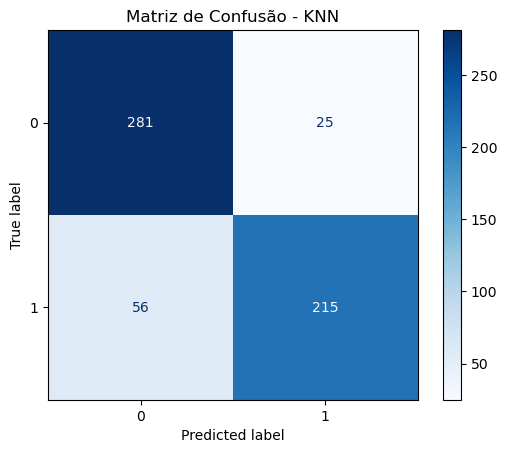

In [ ]:
cm = confusion_matrix(y_test_Q1, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_Q1))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - KNN')

print(classification_report(y_test_Q1, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       306
           1       0.97      0.82      0.89       271

    accuracy                           0.90       577
   macro avg       0.92      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



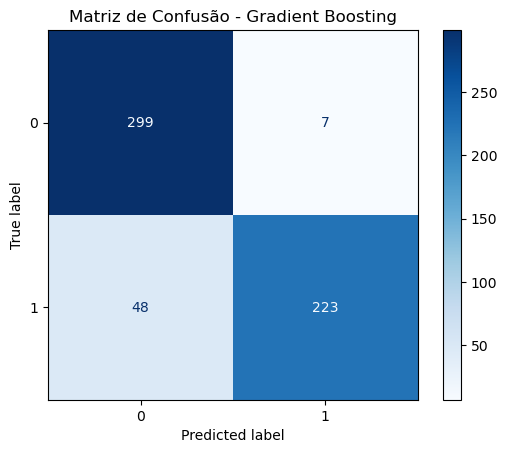

In [ ]:
cm = confusion_matrix(y_test_Q1, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_Q1))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Gradient Boosting')

print(classification_report(y_test_Q1, y_pred_tree))

# (2) Predição de preços de diamantes

Nessa parte, você deve treinar um modelo de regressão sobre o conjunto de dados Diamond. Em
particular, você deve criar um modelo para predizer o valor do preço (representado na variável
dependente price) de um diamante usando os demais atributos como variáveis independentes.

Repare que o conjunto de dados Diamond também contém variáveis não-numéricas. Sendo
assim, você também precisará realizar passos de pré-processamento sobre o conjunto de dados
antes de iniciar o treinamento do modelo.

In [62]:
import pandas as pd

path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
path_data = 'diamonds.csv'


nomes_colunas = ['carat', 'cut', 'color', 'clarity', 'depth', 'table',
                 'price', 'x', 'y', 'z']



df = pd.read_csv(f'{path}/{path_data}', names=nomes_colunas, header=0, index_col=0, delimiter=',')

y = df['price']
df = df.drop(columns=['price'])



In [63]:
from sklearn.preprocessing import OrdinalEncoder


# Lendo a documentação do Kagle:

# quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# color: diamond colour, from J (worst) to D (best)
# ou seja, [J, I, H, G, F, E, D]
# clarity: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) 





ordinalidade_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ordinalidade_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
ordinalidade_clarity = ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

categorical_cols = ['cut', 'color', 'clarity']



# Cria o encoder com as categorias especificadas
ordinal_encoder = OrdinalEncoder(categories=[ordinalidade_cut, ordinalidade_color, ordinalidade_clarity])

# Aplica o fit_transform diretamente nas colunas categóricas
df_encoded = ordinal_encoder.fit_transform(df[categorical_cols])

# Adicionar ao dataframe original
df[categorical_cols] = df_encoded

print(df.head())



   carat  cut  color  clarity  depth  table     x     y     z
1   0.23  4.0    5.0      1.0   61.5   55.0  3.95  3.98  2.43
2   0.21  3.0    5.0      2.0   59.8   61.0  3.89  3.84  2.31
3   0.23  1.0    5.0      4.0   56.9   65.0  4.05  4.07  2.31
4   0.29  3.0    1.0      3.0   62.4   58.0  4.20  4.23  2.63
5   0.31  1.0    0.0      1.0   63.3   58.0  4.34  4.35  2.75


você deve previamente separar aleatoriamente 20% dos exemplos fornecidos
para formarem o conjunto de teste. Isso permitirá que você obtenha uma estimativa do
quão efetivos são os modelos gerados. Certifique-se de avaliar todos os modelos sobre o mesmo
conjunto de teste.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


# aplicar para variáveis numéricas contínuas
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

scaler = StandardScaler()


# Aplicar o scaler e transformar para pd.DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols, index=X_train.index) # aplicar o fit somente no dataset de train
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols, index=X_test.index)


# Remover a coluna original e concatenar no Dataframe original 
X_train = pd.concat([X_train.drop(columns=numerical_cols), X_train_scaled], axis=1)
X_test = pd.concat([X_test.drop(columns=numerical_cols), X_test_scaled], axis=1)


#Dados numéricos normalizados
print(X_train.head(10))

       cut  color  clarity     carat     depth     table         x         y  \
26547  1.0    4.0      1.0  2.560056 -2.550748  2.933861  2.229450  2.138209   
9160   2.0    5.0      1.0  0.447392 -1.220426  1.139575  0.747550  0.656710   
14132  3.0    2.0      3.0  0.637532  0.529996  0.242432  0.765404  0.700284   
15758  1.0    5.0      1.0  1.482597 -0.170173  3.382432  1.318885  1.249310   
24633  2.0    3.0      4.0  1.524851  0.249928 -0.206140  1.372448  1.380030   
49829  3.0    3.0      6.0 -0.503307 -1.430477  0.691003 -0.287995 -0.336766   
38683  4.0    4.0      6.0 -1.052599  0.109895 -1.103283 -1.261050 -1.216950   
44605  4.0    3.0      3.0 -0.566687  0.039878 -0.654711 -0.466537 -0.484916   
11460  4.0    3.0      3.0  0.743165  0.319945 -1.551854  0.899311  0.796145   
2496   4.0    5.0      6.0 -0.608940 -0.310207 -0.654711 -0.537954 -0.458771   

              z  
26547  1.738207  
9160   0.537733  
14132  0.791951  
15758  1.243894  
24633  1.399249  
49829 -0.46

1. sklearn.linear_model.LinearRegression
2. sklearn.neighbors.KNeighborsRegressor
3. sklearn.ensemble.GradientBoostingRegressor

In [65]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

model_LR.fit(X_train, y_train)

# predizir o conjunto de teste
y_pred_lr = model_LR.predict(X_test)

In [66]:
from sklearn.neighbors import KNeighborsRegressor


model_KNN = KNeighborsRegressor()


model_KNN.fit(X_train, y_train)


y_pred_knn = model_KNN.predict(X_test)



In [67]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()

model_GBR.fit(X_train, y_train)


y_pred_gbr = model_GBR.predict(X_test)

Reporte o poder preditivo dos modelos que você construiu. Como métricas de avaliação,
use o RMSE e o coeficiente e determinação R2. Apresente uma análise dos resultados
obtidos.

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")

# KNeighbors
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNeighbors - RMSE: {rmse_knn:.4f}, R2: {r2_knn:.4f}")

# GradientBoostingRegressor
mse_GBR = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_GBR)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"GradientBoostingRegressor - RMSE: {rmse_gbr:.4f}, R2: {r2_gbr:.4f}")


# RMSE (Root Mean Squared Error)
# GBR: previsões estão a cerca de 609 unidades de distância dos valores reais

# R2 score - coeficiente de determinação
#R2 = 1.0 ---> o modelo explica 100% da variabilidade dos dados (previsão perfeita).

#R2 = 0.0 ---> o modelo não explica nada além da média.

#R2 < 0 ---> o modelo é pior que simplesmente prever a média (modelo muito ruim).


Linear Regression - RMSE: 1224.5965, R2: 0.9057
KNeighbors - RMSE: 705.2318, R2: 0.9687
GradientBoostingRegressor - RMSE: 609.1315, R2: 0.9767


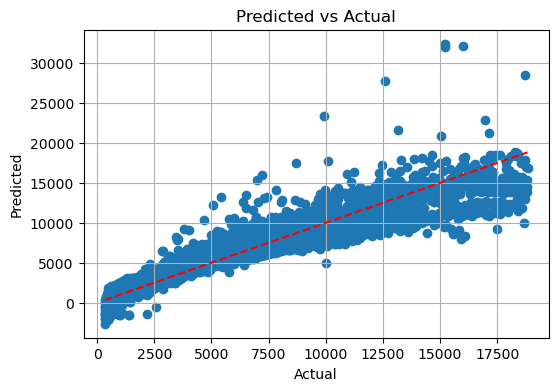

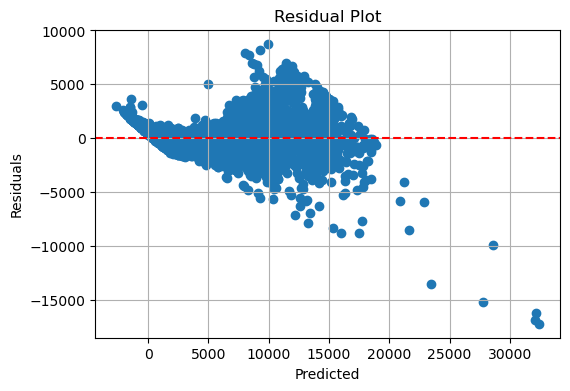

In [69]:
import matplotlib.pyplot as plt

# 1. Predicted vs Actual 
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lr) # Cada ponto é uma previsão feita pelo modelo em relação ao valor real
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # representa a linha ideal, onde previsão = valor real.
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred_lr # resíduo é a diferença entre valor real e valor previsto
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red', linestyle='--') # A linha vermelha em y = 0 representa o ponto onde o modelo acerta perfeitamente
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
# os resíduos devem estar espalhados aleatoriamente em torno da linha zero, sem formar padrões
# neste caso, o modelo está tendo erros mais díspares quanto maior é o valor sendo predizido


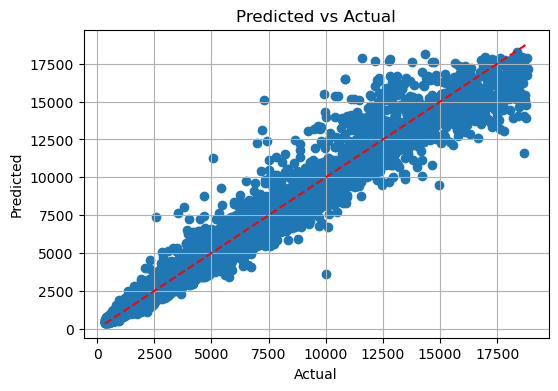

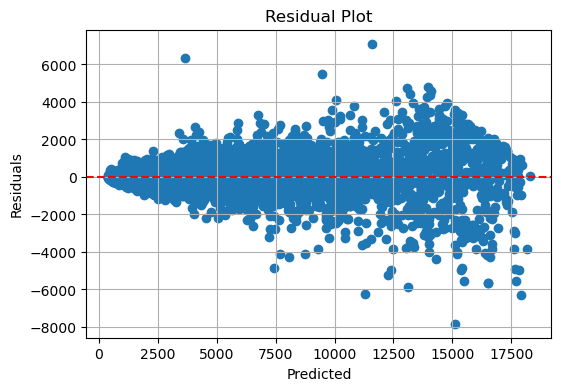

In [70]:
import matplotlib.pyplot as plt

# 1. Predicted vs Actual -- KNearest Neighbors
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_knn) # Cada ponto é uma previsão feita pelo modelo em relação ao valor real
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # representa a linha ideal, onde previsão = valor real.
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred_knn # resíduo é a diferença entre valor real e valor previsto
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_knn, residuals)
plt.axhline(0, color='red', linestyle='--') # A linha vermelha em y = 0 representa o ponto onde o modelo acerta perfeitamente
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
# os resíduos devem estar espalhados aleatoriamente em torno da linha zero, sem formar padrões

# neste caso, estamos obtendo erros espalhados aleatoriamente em torno da linha zero, porém
# obtivemos resíduos > 0 muito díspares, o que significa que y_pred_knn > y_test
# o que nos leva a entender que o modelo superestima mais os valores


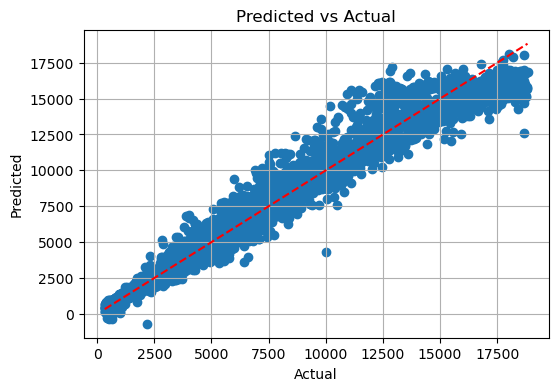

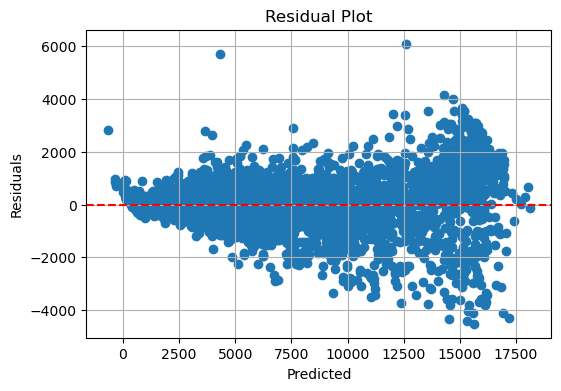

In [71]:
import matplotlib.pyplot as plt

# 1. Predicted vs Actual -- Gradient Boosting Regressor
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_gbr) # Cada ponto é uma previsão feita pelo modelo em relação ao valor real
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # representa a linha ideal, onde previsão = valor real.
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred_gbr # resíduo é a diferença entre valor real e valor previsto
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_gbr, residuals)
plt.axhline(0, color='red', linestyle='--') # A linha vermelha em y = 0 representa o ponto onde o modelo acerta perfeitamente
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
# os resíduos estão espalhados aleatoriamente em torno da linha zero, 
# mas podemos ver um leve aumento do resíduo quando o valor predizido aumenta


# (3) Conjuntos desbalanceados - parte I

In [73]:
import numpy as np
import pickle

path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
filename = 'A652.pickle'
f = open(f"{path}/{filename}", "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(f)

y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)
y_test = np.squeeze(y_test)

print(f"Shapes of datasets:\n"
    f"  - Training set: X_train: {X_train.shape}, y_train: {y_train.shape}\n"
    f"  - Validation set: X_val: {X_val.shape}, y_val: {y_val.shape}\n"
    f"  - Test set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Shapes of datasets:
  - Training set: X_train: (10012, 24), y_train: (10012,)
  - Validation set: X_val: (2506, 24), y_val: (2506,)
  - Test set: X_test: (9582, 24), y_test: (9582,)


Para isso, faça o seguinte, para
cada arquivo fornecido. Se o alvo for igual a 0, altere para o rótulo 0; em caso contrário, altere
para o rótulo 1. Após realizar essa transformação, você deve notar que os conjuntos de dados
resultantes são extremamente desbalanceados.

In [74]:
# Se o alvo for igual a 0, altere para o rótulo 0; em caso contrário, altere para o rótulo 1

count_y_train = 0
count_y_val = 0
count_y_test = 0
for i, y_ in enumerate(y_train):
    if y_ == 0:
        y_train[i] = 0
    else:
        y_train[i] = 1
        count_y_train+=1
                
for i, y_ in enumerate(y_val):
    if y_ == 0:
        y_val[i] = 0
    else:
        y_val[i] = 1
        count_y_val+=1
        
for i, y_ in enumerate(y_test):
    if y_ == 0:
        y_test[i] = 0
    else:
        y_test[i] = 1   
        count_y_test+=1
        
print(f'[y_train] - classe 0: {len(y_train)-count_y_train}; classe 1: {count_y_train} - {100*count_y_train/len(y_train):.2f}%')     
print(f'[y_val] - classe 0: {len(y_val)-count_y_val}; classe 1: {count_y_val} - {100*count_y_val/len(y_val):.2f}%')     
print(f'[y_test] - classe 0: {len(y_test)-count_y_test}; classe 1: {count_y_test} - {100*count_y_test/len(y_test):.2f}%')     


[y_train] - classe 0: 9258; classe 1: 754 - 7.53%
[y_val] - classe 0: 2277; classe 1: 229 - 9.14%
[y_test] - classe 0: 8769; classe 1: 813 - 8.48%


Vamos aplicar 3 técnicas de desbalanceamento de dados: undersampling, oversampling e alteração de
limiar

In [75]:
# Uma vez os y_pred plotados, usaremos essas funções para plotar a confusion matrix e o classification report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Matriz de Confusão')


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      8769
         1.0       0.75      0.37      0.50       813

    accuracy                           0.94      9582
   macro avg       0.85      0.68      0.73      9582
weighted avg       0.93      0.94      0.93      9582



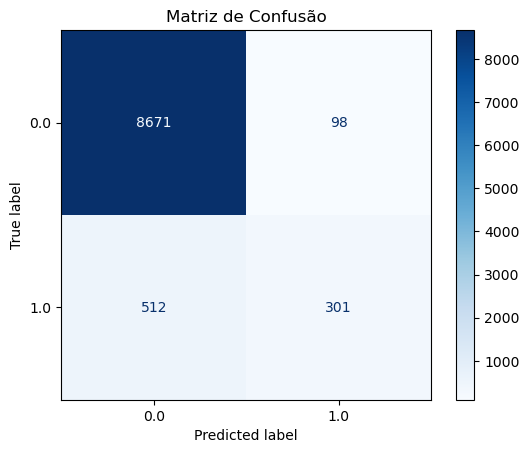

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report



# Inicializar o modelo Gradient Boosting Classifier
model_GBC = GradientBoostingClassifier()

model_GBC.fit(X_train,y_train)

y_pred = model_GBC.predict(X_test)

plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Precisão a 75%
# Recall a 37%
# F1-score a 50%


              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      8769
         1.0       0.51      0.65      0.57       813

    accuracy                           0.92      9582
   macro avg       0.74      0.80      0.76      9582
weighted avg       0.93      0.92      0.92      9582



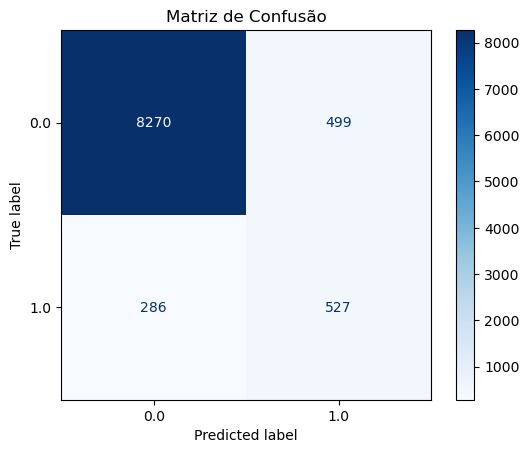

In [77]:
# OVERSAMPLING

from sklearn.utils import resample
import pandas as pd


train_data=pd.concat([pd.DataFrame(X_train),pd.Series(y_train, name='Response')],axis=1)

Response_Zero = train_data[train_data['Response']==0] # majoritária
Response_One = train_data[train_data['Response']==1] # minoritária


# Aumentar o nº de amostras que são de label 1 com reposição para corresponder ao comprimento da classe majoritária (y == 0)
upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# Combinar majority e upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

# Separar novamente os dados entre as variáveis de entrada e alvo
X_train_upsampled = upsampled.drop(columns = ['Response'])
y_train_upsampled = upsampled['Response']


# Testando modelo
model_GBC_upsampled = GradientBoostingClassifier()
model_GBC_upsampled.fit(X_train_upsampled, y_train_upsampled)
y_pred_upsampled = model_GBC_upsampled.predict(X_test)
plot_confusion_matrix(y_test, y_pred_upsampled)
print(classification_report(y_test, y_pred_upsampled))

# Precisão a 51% (menor que o normal - 75%)
# Recall a 65% (maior que o normal - 37%)
# F1-score a 57% (maior que o normal - 50%)



              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      8769
         1.0       0.44      0.70      0.54       813

    accuracy                           0.90      9582
   macro avg       0.70      0.81      0.74      9582
weighted avg       0.93      0.90      0.91      9582



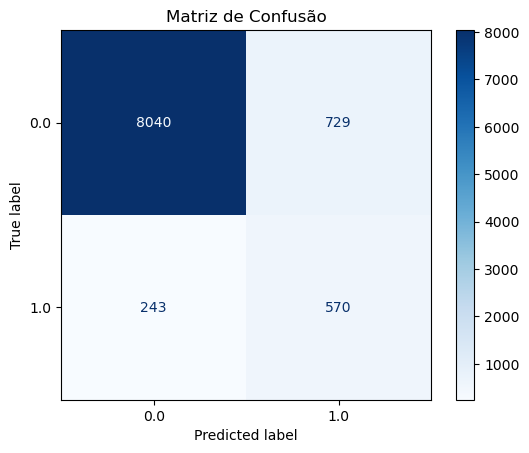

In [78]:
# UNDERSAMPLING


train_data=pd.concat([pd.DataFrame(X_train),pd.Series(y_train, name='Response')],axis=1)

Response_Zero = train_data[train_data['Response']==0] # majoritária
Response_One = train_data[train_data['Response']==1] # minoritária


# Diminuir o nº de amostras que são de label 0 para corresponder ao comprimento da classe minoritária (y == 1)
downsampled_Zero  = resample(Response_Zero,
                          replace=False, # sample without replacement
                          n_samples=len(Response_One), # match minority n
                          random_state=27) # reproducible results

# combinar minority e downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])


# Separar novamente os dados entre as variáveis de entrada e alvo
X_train_downsampled = downsampled.drop(columns = ['Response'])
y_train_downsampled = downsampled['Response']


# Testando modelo
model_GBC_downsampled = GradientBoostingClassifier()
model_GBC_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_downsampled = model_GBC_downsampled.predict(X_test)
plot_confusion_matrix(y_test, y_pred_downsampled)
print(classification_report(y_test, y_pred_downsampled))

# Precisão a 43% (menor que o normal - 75%)
# Recall a 70% (maior que o normal - 37%)
# F1-score a 53% (um pouco maior que o normal - 50%)


Optimal Threshold:  0.2
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      8769
         1.0       0.62      0.59      0.61       813

    accuracy                           0.93      9582
   macro avg       0.79      0.78      0.79      9582
weighted avg       0.93      0.93      0.93      9582



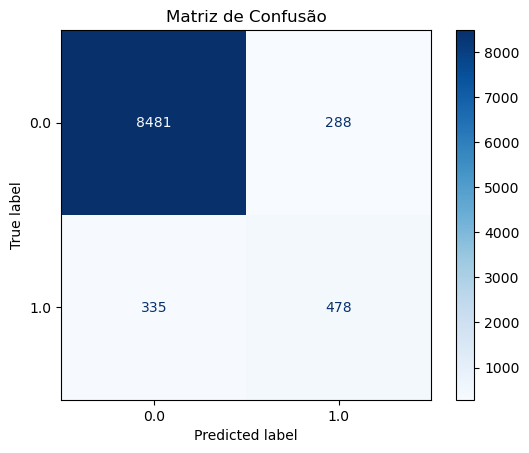

In [80]:
# Alteração de Limiar


# Em modelos que o output são probabilidades, 
# o limiar 'default' é de 0.5 para classificação.
# Em dataset desbalanceados, a classe minoritária tem menos amostras, 
# então usar o default de 0.5 pode gerar um baixo recall, com muitos falsos negativos

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Inicializar o modelo Gradient Boosting Classifier
model_GBC_threshold = GradientBoostingClassifier()

model_GBC_threshold.fit(X_train,y_train)


y_proba = model_GBC_threshold.predict_proba(X_test)[:,1]

# testes de limiar
# iterar entre 0.05 a 0.75 para identificar o limiar que melhor funciona para otimizar:
# a precisão, recall ou f1-score 

best_f1 = 0

thresholds = [ j/20 for j in range(1,16)]

for i in thresholds:
    # calculando y_pred utilizando para cada limiar sendo testado
    y_pred_new_threshold = (model_GBC_threshold.predict_proba(X_val)[:,1]>=i).astype(int)

    # utilizamos o dataset de validação para fazer a seleção do hiperparâmetro do limiar
    # e aqui fazemos o cálculo do f1-score entre o dataset de validação e o y_pred
    
    #precision_adj_threshold =  round(precision_score(y_val, y_pred_new_threshold, average='binary'), 4)
    #recall_adj_threshold = round(recall_score(y_val, y_pred_new_threshold, average='binary'), 4)
    F1_score_adj_threshold =  round((f1_score(y_val, y_pred_new_threshold, average='binary')), 4)
    
    
    if F1_score_adj_threshold > best_f1:
        best_f1 = F1_score_adj_threshold
        optimal_threshold = i

print("Optimal Threshold: ", optimal_threshold)

y_pred_optimal_threshold = [1 if prob>=optimal_threshold else 0 for prob in y_proba]


# Testando modelo
plot_confusion_matrix(y_test, y_pred_optimal_threshold)
print(classification_report(y_test, y_pred_optimal_threshold))

# Precisão a 63% (menor que o normal - 75%)
# Recall a 59% (maior que o normal - 37%)
# F1-score a 61% (o maior até agora)



# (4) Conjuntos desbalanceados - parte II

In [19]:
import numpy as np
import pickle

path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
filename = 'A652.pickle'
f = open(f"{path}/{filename}", "rb")
(X_train, y_train, X_val, y_val, X_test, y_test) = pickle.load(f)

y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)
y_test = np.squeeze(y_test)

print(f"Shapes of datasets:\n"
    f"  - Training set: X_train: {X_train.shape}, y_train: {y_train.shape}\n"
    f"  - Validation set: X_val: {X_val.shape}, y_val: {y_val.shape}\n"
    f"  - Test set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Shapes of datasets:
  - Training set: X_train: (10012, 24), y_train: (10012,)
  - Validation set: X_val: (2506, 24), y_val: (2506,)
  - Test set: X_test: (9582, 24), y_test: (9582,)


Inicialmente você deve criar versões binárias das matrizes alvo y_train, y_val, y_test.
Concretamente, para cada matriz alvo (y_train, y_val, y_test), substitua todos os valores
diferentes de zero por 1 e os valores restantes por 0.

In [21]:
# Se o alvo for igual a 0, altere para o rótulo 0; em caso contrário, altere para o rótulo 1

y_train_bin = np.zeros_like(y_train)
y_val_bin = np.zeros_like(y_val)
y_test_bin = np.zeros_like(y_test)

count_y_train = 0
count_y_val = 0
count_y_test = 0

for i, y_ in enumerate(y_train):
    if y_ == 0:
        y_train_bin[i] = 0
    else:
        y_train_bin[i] = 1
        count_y_train += 1

for i, y_ in enumerate(y_val):
    if y_ == 0:
        y_val_bin[i] = 0
    else:
        y_val_bin[i] = 1
        count_y_val += 1

for i, y_ in enumerate(y_test):
    if y_ == 0:
        y_test_bin[i] = 0
    else:
        y_test_bin[i] = 1
        count_y_test += 1
print(f'[y_train] - classe 0: {len(y_train)-count_y_train}; classe 1: {count_y_train} - {100*count_y_train/len(y_train):.2f}%')     
print(f'[y_val] - classe 0: {len(y_val)-count_y_val}; classe 1: {count_y_val} - {100*count_y_val/len(y_val):.2f}%')     
print(f'[y_test] - classe 0: {len(y_test)-count_y_test}; classe 1: {count_y_test} - {100*count_y_test/len(y_test):.2f}%')     


[y_train] - classe 0: 9258; classe 1: 754 - 7.53%
[y_val] - classe 0: 2277; classe 1: 229 - 9.14%
[y_test] - classe 0: 8769; classe 1: 813 - 8.48%


Treine um modelo de classificação binária usando (X_train, y_train_bin) como conjunto
de treinamento. Chame esse modelo de C.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

C = GradientBoostingClassifier()
C.fit(X_train, y_train_bin)

y_pred_C = C.predict(X_train) # aplicar C a todos os exemplos em X_train como dito na questão


Defina X_train_1 como o subconjunto de X_train que foi classificado por C como sendo
da classe 1. Defina também y_train_1 como o subconjunto de y_train correspondente
a X_train_1.

In [44]:
#selecionamos os índices dentro do set de treinamento 
# onde a predição pelo C foi '1'
indices_class_1 = (y_pred_C == 1)


# Usamos esses índices para selecionar os subconjuntos desejados
X_train_1 = X_train[indices_class_1]
y_train_1 = y_train[indices_class_1]

print(len(X_train_1))
print(len(y_train_1))

print(np.sum(y_train_1 > 0))

568
568
465


Treine um modelo de regressão usando (X_train_1, y_train_1) como conjunto de treinamento.
Chame esse modelo de R.

In [45]:
from sklearn.linear_model import LinearRegression

R = LinearRegression()
R.fit(X_train_1, y_train_1)


LinearRegression()

Para obter R′(x), i.e., a previsão de precipitação para um novo exemplo x, inicialmente
compute C(x). Em seguida, use o valor computado para computar R′(x) da seguinte
forma:

- R'(x) = 0 se C(x)=0 || R(x) se C(x)=1

In [46]:
# Modelo R'(x)
def modelo_r_linha(X_test):
    
    # usamos o classificador para predizer se há chuva (1) ou não (0)
    y_pred_c_test = C.predict(X_test) 

    # selecionamos os índices onde a predição por C foi igual a 1
    indices_class_1 = (y_pred_c_test == 1)

    # Usamos esses índices para selecionar o subconjunto de X_test de classe y==1 predizida por C
    X_test_R = X_test[indices_class_1]

    # fazemos as predições para o Regressor dentro do subconjunto selecionado acima
    y_pred_R = R.predict(X_test_R)
    
    # Inicializa o vetor de previsão geral com zeros
    y_pred_geral = np.zeros_like(y_pred_c_test, dtype=float)

    # Preenche com as previsões de R onde C(x) == 1
    y_pred_geral[indices_class_1] = y_pred_R
    
    return y_pred_geral


In [47]:
y_pred_geral = modelo_r_linha(X_test)

Compare seu modelo de regressão
produzido por meio desse procedimento com o modelo treinado usando (X_train, y_train)
como conjunto de treinamento.

Esse procedimento produziu um melhor modelo do ponto de
vista preditivo? Como métrica de avaliação, use RMSE. Reporte valores dessa métrica para
cada nível de severidade de precipitação.

In [48]:
from sklearn.linear_model import LinearRegression

RL = LinearRegression()
RL.fit(X_train, y_train)
y_pred_normal = RL.predict(X_test)


In [49]:
from sklearn.metrics import mean_squared_error

# RMSE para o modelo R'(x)
mse = mean_squared_error(y_test_bin, y_pred_geral)
rmse = np.sqrt(mse)
print(f'RMSE (R_linha): {rmse:.4f}')


# RMSE para o modelo de Regressão Linear normal
mse_2 = mean_squared_error(y_test_bin, y_pred_normal)
rmse_2 = np.sqrt(mse_2)
print(f'RMSE (RL): {rmse_2:.4f}')


RMSE (R_linha): 0.4387
RMSE (RL): 0.3611


Níveis de severidade de eventos de precipitação:

In [50]:
import pandas as pd
import numpy as np


# Função para categorizar o nível de severidade
def categorizar_precipitacao(x):
    if x < 5:
        return "Sem chuva / Leve"
    elif x < 25:
        return "Moderada"
    elif x < 50:
        return "Forte"
    else:
        return "Tempestade"

# Criar DataFrame
data = pd.DataFrame({'Precipitação (mm/h)': y_pred_geral})
data['Nivel de Severidade'] = data['Precipitação (mm/h)'].apply(categorizar_precipitacao)

# Agrupar os dados por nível de severidade e contar as ocorrências
table = data['Nivel de Severidade'].value_counts().reset_index()
table.columns = ['Nivel de Severidade', 'Contagem']

print(table)


  Nivel de Severidade  Contagem
0    Sem chuva / Leve      9573
1            Moderada         9


# (5) Calibração de modelos

Sua tarefa nesta parte é produzir versões calibradas dos modelos originais criados
na parte 1. Investigue o grau de calibração dos modelos originais e, conforme for o caso, aplique
alguma técnica para calibrar os resultados do modelo. Você está livre para usar qualquer das
técnicas de calibração que abordamos em aula, ou mesmo outra técnica que encontrar na
literatura. 

Apresente gráficos para ilustrar os graus de calibração dos modelos antes e após
aplicar a calibração. Apresente uma análise dos resultados obtidos.

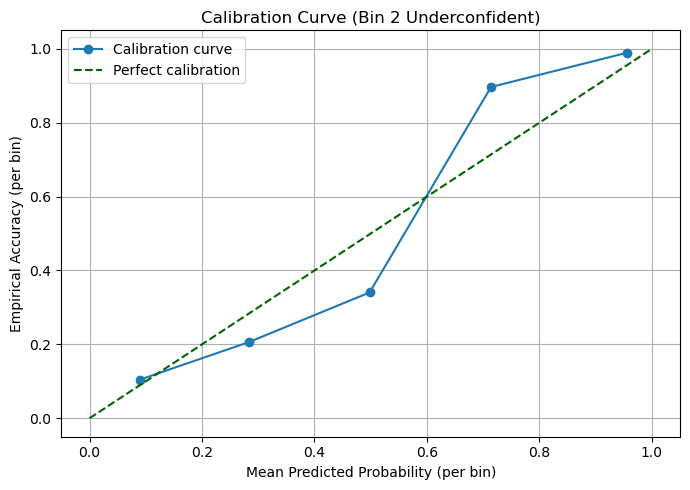

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# distribuição de probabilidade calculadas para cada modelo na parte 1
# Logistic Regression
predicted_probs = y_pred_prob_lr

true_labels = y_test_Q1

# Step 1. Bin assignment
bin_edges = np.linspace(0.0, 1.0, 6)
bin_ids = np.digitize(predicted_probs, bin_edges, right=False) - 1

# Step 2. Construct bin-wise summary
bin_data = pd.DataFrame({'bin': bin_ids, 'prob': predicted_probs, 'label': true_labels})
calibration_summary = bin_data.groupby('bin').agg(
    mean_predicted_prob=('prob', 'mean'), # médias das probabilidades predizidas por bin
    empirical_accuracy=('label', 'mean'), # proporção verdadeira das etiquetas positivas por bin
    count=('label', 'size')
).reset_index()

# Step 3. Plot calibration curve
plt.figure(figsize=(7, 5))
plt.plot(calibration_summary['mean_predicted_prob'],
         calibration_summary['empirical_accuracy'], # Y-axis: acurácia observada por bin 
         marker='o', linestyle='-', label='Calibration curve')


# Um modelo perfeitamente calibrado realizaria predições de probabilidade 
# que se alinham com as saídas de observações empíricas
# No Plot, podemos observar que
# o modelo NÃO ESTÁ perfeitamente calibrado.
plt.plot([0, 1], [0, 1], linestyle='--', color='darkgreen', label='Perfect calibration')

plt.xlabel('Mean Predicted Probability (per bin)')
plt.ylabel('Empirical Accuracy (per bin)')
plt.title('Calibration Curve (Bin 2 Underconfident)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


# (6) Validação cruzada aninhada

Nessa parte
do trabalho você deve realizar a validação cruzada aninhada (nested cross-validation) para
encontrar (1) uma boa combinação de hiperparâmetros para ajustar um modelo e (2) um
bom modelo para esse conjunto de dados.

In [12]:
import pandas as pd

path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
path_data = 'diamonds.csv'


nomes_colunas = ['carat', 'cut', 'color', 'clarity', 'depth', 'table',
                 'price', 'x', 'y', 'z']



df = pd.read_csv(f'{path}/{path_data}', names=nomes_colunas, header=0, index_col=0, delimiter=',')

y = df['price']
df = df.drop(columns=['price'])



In [13]:
from sklearn.preprocessing import OrdinalEncoder


# Transformando as variáveis ordinais conforme a documentação do Kagle
ordinalidade_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ordinalidade_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
ordinalidade_clarity = ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

categorical_cols = ['cut', 'color', 'clarity']

# Cria o encoder com as categorias especificadas
ordinal_encoder = OrdinalEncoder(categories=[ordinalidade_cut, ordinalidade_color, ordinalidade_clarity])

# Aplica o fit_transform diretamente nas colunas categóricas
df_encoded = ordinal_encoder.fit_transform(df[categorical_cols])

# Adicionar ao dataframe original
df[categorical_cols] = df_encoded

print(df.head())



   carat  cut  color  clarity  depth  table     x     y     z
1   0.23  4.0    5.0      1.0   61.5   55.0  3.95  3.98  2.43
2   0.21  3.0    5.0      2.0   59.8   61.0  3.89  3.84  2.31
3   0.23  1.0    5.0      4.0   56.9   65.0  4.05  4.07  2.31
4   0.29  3.0    1.0      3.0   62.4   58.0  4.20  4.23  2.63
5   0.31  1.0    0.0      1.0   63.3   58.0  4.34  4.35  2.75


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


# aplicar para variáveis numéricas contínuas
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

scaler = StandardScaler()


# Aplicar o scaler e transformar para pd.DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols, index=X_train.index) # aplicar o fit somente no dataset de train
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols, index=X_test.index)


# Remover a coluna original e concatenar no Dataframe original 
X_train = pd.concat([X_train.drop(columns=numerical_cols), X_train_scaled], axis=1)
X_test = pd.concat([X_test.drop(columns=numerical_cols), X_test_scaled], axis=1)


#Dados numéricos normalizados
print(X_train.head(10))

       cut  color  clarity     carat     depth     table         x         y  \
26547  1.0    4.0      1.0  2.560056 -2.550748  2.933861  2.229450  2.138209   
9160   2.0    5.0      1.0  0.447392 -1.220426  1.139575  0.747550  0.656710   
14132  3.0    2.0      3.0  0.637532  0.529996  0.242432  0.765404  0.700284   
15758  1.0    5.0      1.0  1.482597 -0.170173  3.382432  1.318885  1.249310   
24633  2.0    3.0      4.0  1.524851  0.249928 -0.206140  1.372448  1.380030   
49829  3.0    3.0      6.0 -0.503307 -1.430477  0.691003 -0.287995 -0.336766   
38683  4.0    4.0      6.0 -1.052599  0.109895 -1.103283 -1.261050 -1.216950   
44605  4.0    3.0      3.0 -0.566687  0.039878 -0.654711 -0.466537 -0.484916   
11460  4.0    3.0      3.0  0.743165  0.319945 -1.551854  0.899311  0.796145   
2496   4.0    5.0      6.0 -0.608940 -0.310207 -0.654711 -0.537954 -0.458771   

              z  
26547  1.738207  
9160   0.537733  
14132  0.791951  
15758  1.243894  
24633  1.399249  
49829 -0.46

In [18]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score


# Load dataset (a part of it)
X = X_train[:13485]
y = y_train[:13485]




# Outer cross-validation (5-fold)
# Not using Stratified because it would ensure that each fold has the same proportion 
# of observations with a given label
# Since 'price' is continuous, we cannot use it
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)


models_and_parameters = {
    'knr': (KNeighborsRegressor(), {
            'n_neighbors': [3, 5, 7, 9, 11],      # número de vizinhos
            'weights': ['uniform', 'distance'],   # peso de cada vizinho
            'metric': ['euclidean', 'manhattan']  # distância usada
            }),
    'gbr': (GradientBoostingRegressor(),
           {
               'loss': ["squared_error", "absolute_error", "huber", "quantile"],
                'learning_rate': [i / 100 for i in range(1, 11)],  # 0.01 to 0.1
                'n_estimators': [50, 100, 200]
           })}


# Nested Cross-Validation
# Loop externo para iterar os modelos sendo testados
for name, (model, param_grid) in models_and_parameters.items():
    # Lista para armazenar os escores CV
    outer_scores = []
    r2_scores = []
    
    # 5 iterações (5 folds)
    for train_idx, test_idx in outer_cv.split(X, y):
        
        # Fazer Split nos dados entre train e test sets para os folds
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
               
        # cross-validation interna (encontrar os hiperparâmetros optimais)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
        
        # Fit o modelo nos dados de treinamento para o fold da presente iteração
        grid_search.fit(X_train_fold, y_train_fold)
        
        # Usar o melhor modelo para predizer o test set do fold
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_fold)
        
        # Calcular as métricas de Mean Squared Error e R2 score no test set do folder
        outer_score = mean_squared_error(y_test_fold, y_pred)
        r2 = r2_score(y_test_fold, y_pred)
        
        # Incrementar os scores
        outer_scores.append(outer_score)
        r2_scores.append(r2)

    # Mostrar a média e standard deviation dos CV scores dos folders
    print(f'{name}: {best_model}')
    print(f"Nested CV Mean Squared Error (model: {name}): {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    print(f"Nested CV R² Score (model: {name}): {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
    print('---')

knr: KNeighborsRegressor(metric='manhattan', n_neighbors=11, weights='distance')
Nested CV Mean Squared Error (model: knr): 511289.5835 ± 61988.0134
Nested CV R² Score: 0.9676 ± 0.0031
---
gbr: GradientBoostingRegressor(loss='huber', n_estimators=200)
Nested CV Mean Squared Error (model: gbr): 401755.4825 ± 80253.8865
Nested CV R² Score: 0.9745 ± 0.0047
---
